In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
corpus = 'manual' # 'mrpc'/'manual'

folder_input_path = '/content/drive/My Drive/Colab Notebooks/5_Corpora/corpora/'
img_path = '/content/drive/My Drive/Colab Notebooks/5_Corpora/plots/'
csv_file_path = f'{corpus}-triplet-corpus.csv'

In [32]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(folder_input_path + csv_file_path)

df.head()

,original,positive,negative,positive_cos_sim,negative_cos_sim,original_label,positive_label,negative_label,original_sentiment_label,original_sentiment_score,...,positive_chrfpp,negative_chrfpp,positive_mover,negative_mover,positive_bert,negative_bert,positive_bleurt,negative_bleurt,positive_cosine_similarity,negative_cosine_similarity
0,I usually wake up early in the morning.,I enjoy the freshness of early mornings.,Waking up early often feels too abrupt.,0.615547,0.768586,NEU,POS,NEG,NEU,0.945723,...,28.846154,6.451613,1.0,1.0,0.565429,0.628388,0.578367,0.528240,0.615547,0.768586
1,I regularly take a walk in the evening.,My evening walks are refreshing and peaceful.,Evening walks can be tiring after a long day.,0.759722,0.810249,NEU,POS,NEG,NEU,0.777473,...,9.677419,9.803922,1.0,1.0,0.600216,0.546758,0.450409,0.464059,0.759722,0.810249
2,The weather is unpredictable today.,The weather today holds exciting surprises.,Today's weather is frustratingly inconsistent.,0.769934,0.762804,NEU,POS,NEG,NEU,0.939865,...,32.894737,9.933775,1.0,1.0,0.786924,0.793672,0.717583,0.692635,0.769934,0.762804
3,The restaurant offers food.,The cuisine at this restaurant is delightfully...,The food at this restaurant is barely passable.,0.693150,0.575224,NEU,POS,NEG,NEU,0.651773,...,16.949153,17.094017,1.0,1.0,0.611858,0.617260,0.508035,0.570751,0.682496,0.560049
4,This movie features a standard plot.,This movie boasts a captivating and thought-pr...,The plot of this movie is confusing and poorly...,0.594192,0.581412,NEU,POS,NEG,NEU,0.928657,...,36.184211,10.135135,1.0,1.0,0.702324,0.683737,0.624876,0.512334,0.566464,0.548903


In [33]:
# Columns to normalize: TER, chrF, chrF++
columns_to_normalize = ['positive_ter', 'negative_ter', 'positive_chrf', 'negative_chrf', 'positive_chrfpp', 'negative_chrfpp']

# Apply Min-Max normalization
for column in columns_to_normalize:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column + '_normalized'] = (df[column] - min_val) / (max_val - min_val)

In [34]:
columns = df.columns

measures_drop = ['positive', 'positive_label', 'positive_sentiment_label', 'positive_sentiment_score',
                 'negative', 'negative_label', 'negative_sentiment_label', 'negative_sentiment_score',
                 'positive_ter', 'negative_ter', 'positive_chrf', 'negative_chrf', 'positive_chrfpp', 'negative_chrfpp']

measures = [measure for measure in columns if measure not in measures_drop]

positive_measures = [col for col in measures if 'positive' in col]
negative_measures = [col for col in measures if 'negative' in col]

print(positive_measures)
print(negative_measures)

['positive_cos_sim', 'positive_bleu', 'positive_rouge_n', 'positive_rouge_s', 'positive_rouge_l', 'positive_meteor', 'positive_mover', 'positive_bert', 'positive_bleurt', 'positive_cosine_similarity', 'positive_ter_normalized', 'positive_chrf_normalized', 'positive_chrfpp_normalized']
['negative_cos_sim', 'negative_bleu', 'negative_rouge_n', 'negative_rouge_s', 'negative_rouge_l', 'negative_meteor', 'negative_mover', 'negative_bert', 'negative_bleurt', 'negative_cosine_similarity', 'negative_ter_normalized', 'negative_chrf_normalized', 'negative_chrfpp_normalized']


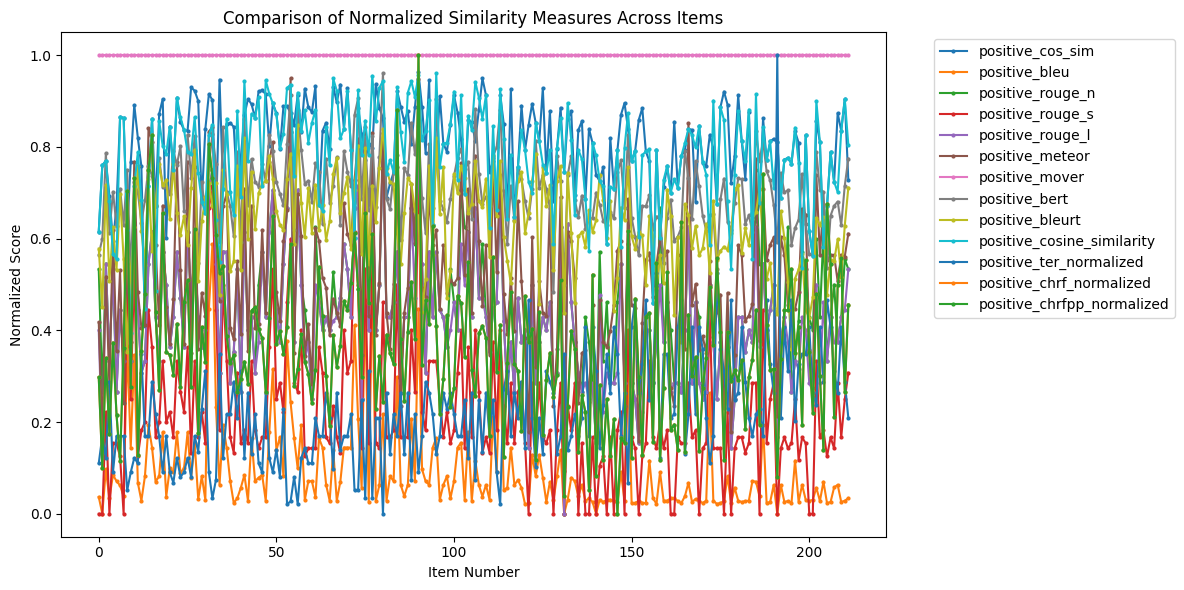

In [35]:
import matplotlib.pyplot as plt

# Plot configuration
plt.figure(figsize=(12, 6))

# Plot each measure on the same plot
for measure in positive_measures:
    plt.plot(df.index, df[measure], label=measure, marker='o', linestyle='-', markersize=2)

plt.xlabel('Item Number')
plt.ylabel('Normalized Score')
plt.title('Comparison of Normalized Similarity Measures Across Items')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [36]:
df.head()

,original,positive,negative,positive_cos_sim,negative_cos_sim,original_label,positive_label,negative_label,original_sentiment_label,original_sentiment_score,...,positive_bleurt,negative_bleurt,positive_cosine_similarity,negative_cosine_similarity,positive_ter_normalized,negative_ter_normalized,positive_chrf_normalized,negative_chrf_normalized,positive_chrfpp_normalized,negative_chrfpp_normalized
0,I usually wake up early in the morning.,I enjoy the freshness of early mornings.,Waking up early often feels too abrupt.,0.615547,0.768586,NEU,POS,NEG,NEU,0.945723,...,0.578367,0.528240,0.615547,0.768586,0.110169,0.130,0.297692,0.072688,0.297692,0.072688
1,I regularly take a walk in the evening.,My evening walks are refreshing and peaceful.,Evening walks can be tiring after a long day.,0.759722,0.810249,NEU,POS,NEG,NEU,0.777473,...,0.450409,0.464059,0.759722,0.810249,0.169492,0.190,0.099871,0.110458,0.099871,0.110458
2,The weather is unpredictable today.,The weather today holds exciting surprises.,Today's weather is frustratingly inconsistent.,0.769934,0.762804,NEU,POS,NEG,NEU,0.939865,...,0.717583,0.692635,0.769934,0.762804,0.122034,0.064,0.339474,0.111921,0.339474,0.111921
3,The restaurant offers food.,The cuisine at this restaurant is delightfully...,The food at this restaurant is barely passable.,0.693150,0.575224,NEU,POS,NEG,NEU,0.651773,...,0.508035,0.570751,0.682496,0.560049,0.288136,0.280,0.174915,0.192593,0.174915,0.192593
4,This movie features a standard plot.,This movie boasts a captivating and thought-pr...,The plot of this movie is confusing and poorly...,0.594192,0.581412,NEU,POS,NEG,NEU,0.928657,...,0.624876,0.512334,0.566464,0.548903,0.090395,0.240,0.373421,0.114189,0.373421,0.114189


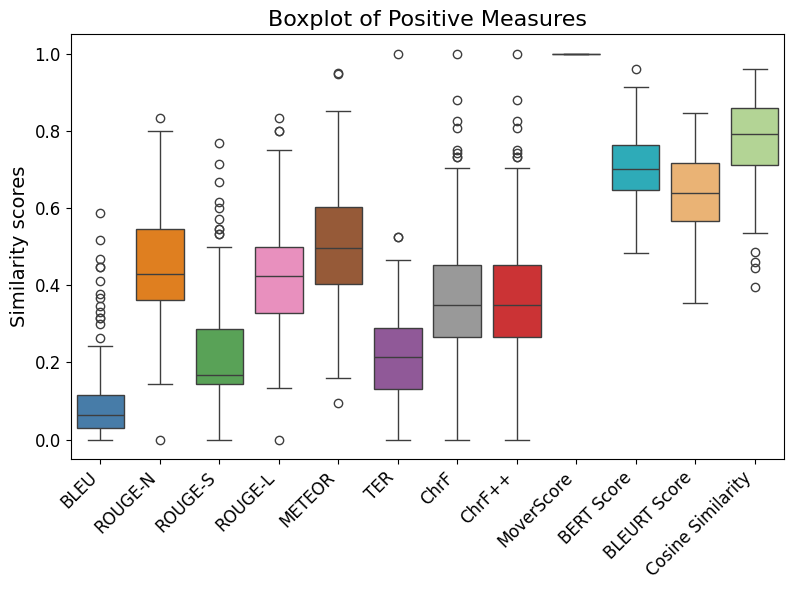

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'data' is your DataFrame

# Define your column to label mappings for positive and negative measures
positive_column_labels = {
    'positive_bleu': 'BLEU',
    'positive_rouge_n': 'ROUGE-N',
    'positive_rouge_s': 'ROUGE-S',
    'positive_rouge_l': 'ROUGE-L',
    'positive_meteor': 'METEOR',
    'positive_ter_normalized': 'TER',
    'positive_chrf_normalized': 'ChrF',
    'positive_chrfpp_normalized': 'ChrF++',
    'positive_mover': 'MoverScore',
    'positive_bert': 'BERT Score',
    'positive_bleurt': 'BLEURT Score',
    'positive_cosine_similarity': 'Cosine Similarity'
}

negative_column_labels = {k.replace('positive', 'negative'): v for k, v in positive_column_labels.items()}

# Select the data for positive and negative measures
positive_data = df[positive_column_labels.keys()]
negative_data = df[negative_column_labels.keys()]

# Define an expanded color palette suitable for color-blind readers
color_palette = [
    '#377eb8',  # Blue
    '#ff7f00',  # Orange
    '#4daf4a',  # Green
    '#f781bf',  # Pink
    '#a65628',  # Brown
    '#984ea3',  # Purple
    '#999999',  # Grey
    '#e41a1c',  # Red
    '#dede00',  # Lime
    '#17becf',  # Cyan
    '#fdb462',  # Light Orange
    '#b2df8a',  # Light Green
    # '#fb9a99',  # Light Red
    # '#cab2d6',  # Light Purple
    # '#ffff99',  # Light Yellow
    # '#b15928',  # Dark Brown
    # '#a6cee3',  # Light Blue
    # '#6a3d9a'   # Dark Purple
]

# Plot for positive measures
plt.figure(figsize=(8, 6))
sns.boxplot(data=positive_data, palette=color_palette)
plt.xticks(range(len(positive_column_labels)), list(positive_column_labels.values()), rotation=45, ha="right", fontsize=12)
plt.title('Boxplot of Positive Measures', fontsize=16)
plt.ylabel('Similarity scores', fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)

plt.savefig(img_path + f'{corpus}-boxplot-positive-sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

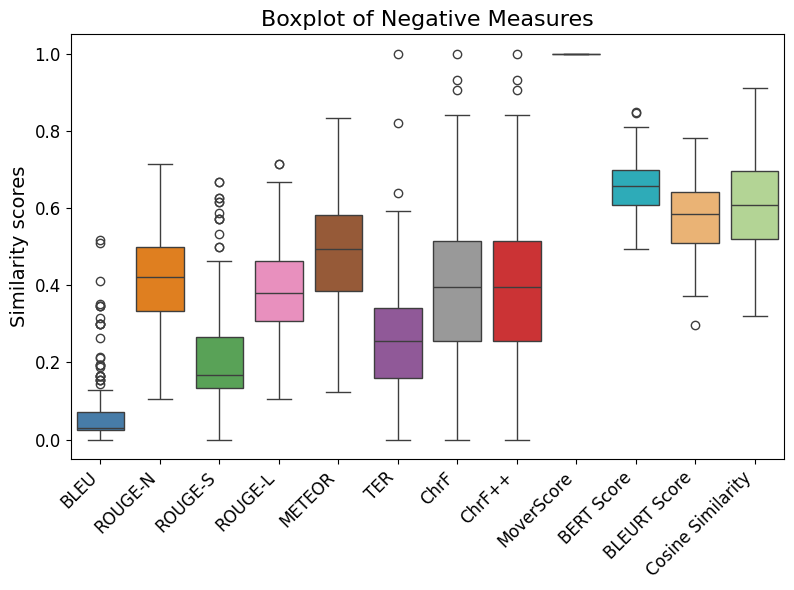

In [38]:
# Plot for negative measures
plt.figure(figsize=(8, 6))
sns.boxplot(data=negative_data, palette=color_palette)
plt.xticks(range(len(positive_column_labels)), list(positive_column_labels.values()), rotation=45, ha="right", fontsize=12)
plt.title('Boxplot of Negative Measures', fontsize=16)
plt.ylabel('Similarity scores', fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)

plt.savefig(img_path + f'{corpus}-boxplot-negative-sentiment.png', dpi=300, bbox_inches='tight')
plt.show()